In [1]:
!pip install --upgrade gdown   # update gdown
!gdown 1BhbQlsHiztZrYbq9ApcuLpTaFYn8a5cq  # Download database images
!gdown 1rOUMgzlwo44rUCc89wcdguYFbzIZK51_  # Download features extraction from database images

!unzip imgs_db.zip # unzip imgs_db
!mkdir /content/image_retrieval

!mv -T /content/img  /content/image_retrieval/imgs_db # rename folder img to imgs_db
!mv /content/512_features_db.npz /content/image_retrieval/


!mkdir /content/image_retrieval/query_images
!wget https://www.dmarge.com/wp-content/uploads/2021/01/dwayne-the-rock-.jpg -P /content/image_retrieval/query_images
!wget https://upload.wikimedia.org/wikipedia/commons/thumb/3/3a/Cat03.jpg/800px-Cat03.jpg -P /content/image_retrieval/query_images

!rm -rf /content/imgs_db.zip # delete imgs_db.zip file

Streaming output truncated to the last 5000 lines.
  inflating: img/plant_Grass/0.22230415590634978.jpg  
  inflating: img/plant_Grass/0.2264497082497725.jpg  
  inflating: img/plant_Grass/0.22686571965136038.jpg  
  inflating: img/plant_Grass/0.23764367911245143.jpg  
  inflating: img/plant_Grass/0.24089632724202648.jpg  
  inflating: img/plant_Grass/0.24801499253481585.jpg  
  inflating: img/plant_Grass/0.25288460054747297.jpg  
  inflating: img/plant_Grass/0.26045762555777585.jpg  
  inflating: img/plant_Grass/0.2652743728655078.jpg  
  inflating: img/plant_Grass/0.26690155770918533.jpg  
  inflating: img/plant_Grass/0.271136424695651.jpg  
  inflating: img/plant_Grass/0.281997569766693.jpg  
  inflating: img/plant_Grass/0.282946138105134.jpg  
  inflating: img/plant_Grass/0.28454185012096034.jpg  
  inflating: img/plant_Grass/0.29290665153491735.jpg  
  inflating: img/plant_Grass/0.30078633143420175.jpg  
  inflating: img/plant_Grass/0.3121658407776664.jpg  
  inflating: img/plant_

In [2]:
# load lib
import tensorflow as tf
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [3]:
class SearchEngine:
    def __init__(self, model, dir_images, p_src_features):
        if model == "resnet50":
            self.model = tf.keras.applications.resnet50.ResNet50(include_top=False, weights='imagenet', pooling="avg")

        if p_src_features is None or not os.path.exists(p_src_features):
            self.db_extract_features(dir_images, p_src_features)
        db = np.load(p_src_features)
        self.path_imgs = db["p_imgs"]
        self.src_features = db["features"]   
    
    def load_img(self, img):
        if isinstance(img, str):
            img = cv2.imread(img)
        return img
        
    def preprocess(self, img):
        img = self.load_img(img)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (224, 224))
        if len(img.shape) <= 3:
            img = img[None, :]
        return img

    # Extract feature from image
    def extractor(self, img):
        img = self.preprocess(img)
        feature = self.model(img).numpy()
        feature = feature/np.linalg.norm(feature)
        return feature
    
    def search(self, query_img, display=True, top=30):
        dest_feature = self.extractor(query_img)
        scores = (dest_feature @ self.src_features.T)[0]
        idxs_max = np.argsort(scores)[::-1][:top]
        if display:
            self.display(self.path_imgs[idxs_max])

        return list(zip(scores[idxs_max], self.path_imgs[idxs_max]))

    # Display result
    def display(self, paths, columns = 5, rows = 6):
        fig = plt.figure(figsize=(15, 15))
        for i, path in enumerate(paths):
            fig.add_subplot(rows, columns, i + 1)
            plt.imshow(plt.imread(path))
            plt.axis("off")
        plt.show()

    # Extract database images to features
    def db_extract_features(self, dir_images, p_src_features):
        path_imgs = []
        features = []
        for dir_cls in tqdm(os.listdir(dir_images)):
            for idx, name_img in enumerate(os.listdir(f"{dir_images}/{dir_cls}")):
                try:
                    p_img = f"{dir_images}/{dir_cls}/{name_img}"
                    feature = self.extractor(p_img)
                    features.extend(feature)
                    path_imgs.append(p_img)
                except:
                    print("error:", p_img)

        path_imgs = np.array(path_imgs)
        features = np.array(features)

        np.savez(p_src_features, p_imgs=path_imgs, features=features)

In [4]:
dir_images="/content/image_retrieval/imgs_db"
p_src_features="/content/image_retrieval/512_features_db.npz"
model="resnet50"
search_engine = SearchEngine(model=model, dir_images=dir_images, p_src_features=p_src_features)

94765736/94765736 [==============================] - 3s 0us/step


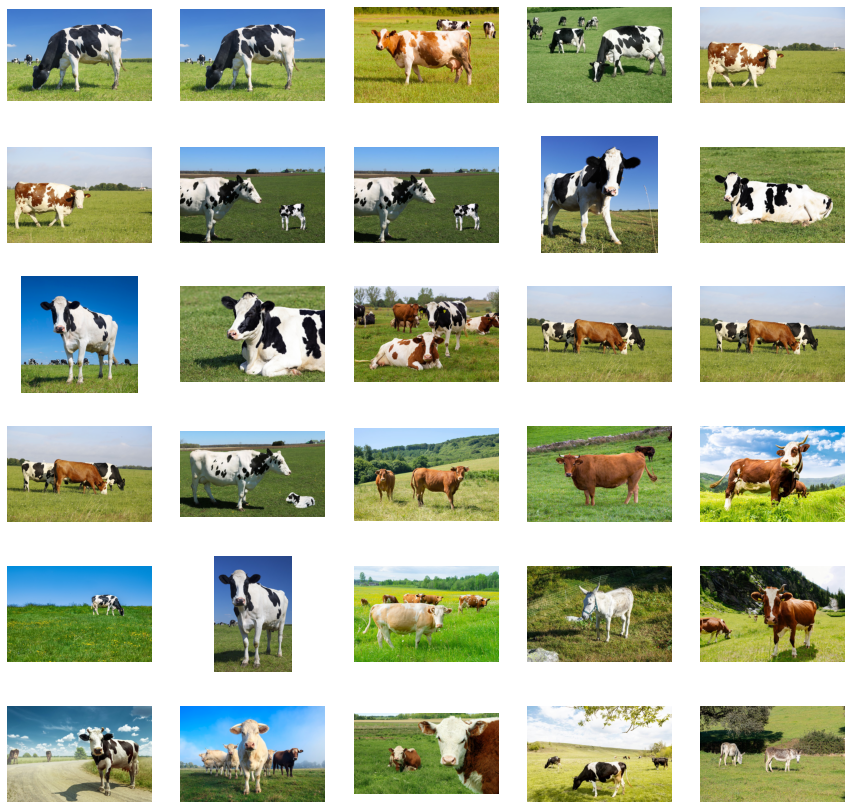

[(0.8465688,
  '/content/image_retrieval/imgs_db/animal_cows/0.27371791224206077.jpg'),
 (0.8465688,
  '/content/image_retrieval/imgs_db/scenery_farmland/0.3065282695324111.jpg'),
 (0.8326756,
  '/content/image_retrieval/imgs_db/animal_cows/0.10693273141528692.jpg'),
 (0.7911577,
  '/content/image_retrieval/imgs_db/animal_cows/0.8898105428621153.jpg'),
 (0.7880919,
  '/content/image_retrieval/imgs_db/scenery_farmland/0.344936310012374.jpg'),
 (0.7880919,
  '/content/image_retrieval/imgs_db/animal_cows/0.5997811056416578.jpg'),
 (0.7813624,
  '/content/image_retrieval/imgs_db/animal_cows/0.730366515802476.jpg'),
 (0.7813624,
  '/content/image_retrieval/imgs_db/scenery_farmland/0.4359690928777581.jpg'),
 (0.7674353,
  '/content/image_retrieval/imgs_db/animal_cows/0.5517303036435238.jpg'),
 (0.76592183,
  '/content/image_retrieval/imgs_db/animal_cows/0.041749837550997815.jpg'),
 (0.7646458,
  '/content/image_retrieval/imgs_db/animal_cows/0.3261783169764476.jpg'),
 (0.76077425,
  '/content

In [5]:
p_query = "/content/image_retrieval/query_images/800px-Cat03.jpg"
search_engine.search(p_query)

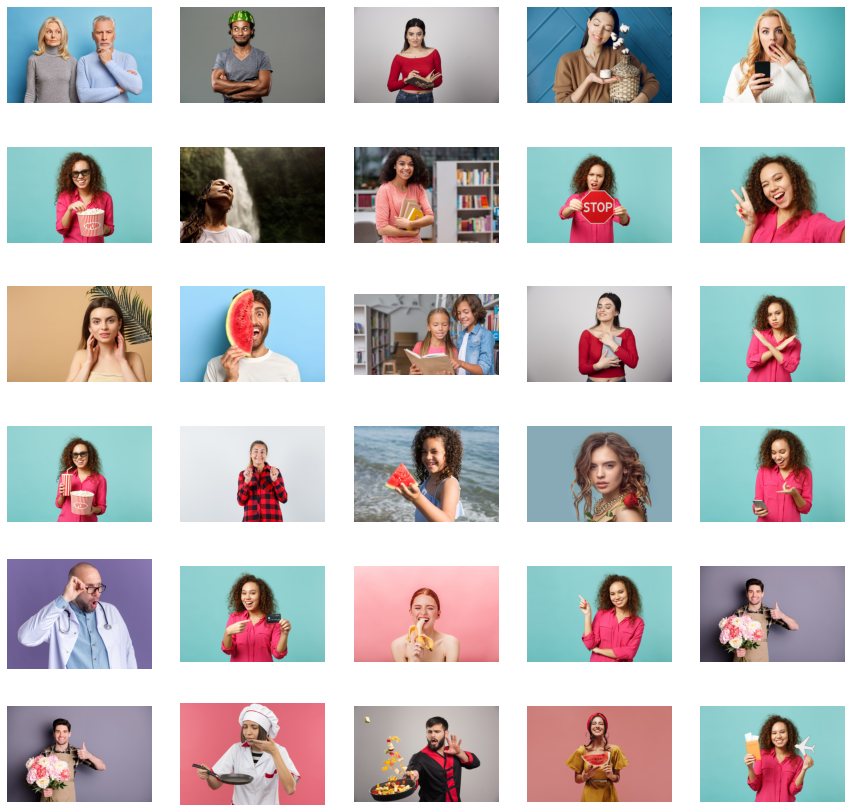

[(0.6912594,
  '/content/image_retrieval/imgs_db/furniture_Clothes/0.158860828770782.jpg'),
 (0.6871021,
  '/content/image_retrieval/imgs_db/plant_watermelon/0.5437576084553831.jpg'),
 (0.67083025,
  '/content/image_retrieval/imgs_db/furniture_book/0.10749024625857428.jpg'),
 (0.6701819,
  '/content/image_retrieval/imgs_db/plant_CottonPlant/0.7965272170095347.jpg'),
 (0.66634345,
  '/content/image_retrieval/imgs_db/furniture_Clothes/0.7063987962607056.jpg'),
 (0.6654832,
  '/content/image_retrieval/imgs_db/plant_Corn/0.21492063273418938.jpg'),
 (0.66541886,
  '/content/image_retrieval/imgs_db/scenery_waterfall/0.9975141776972539.jpg'),
 (0.66437876,
  '/content/image_retrieval/imgs_db/furniture_Bookcase/0.015770883592431284.jpg'),
 (0.6620927,
  '/content/image_retrieval/imgs_db/furniture_Clothes/0.9661403711086842.jpg'),
 (0.6574924,
  '/content/image_retrieval/imgs_db/furniture_Clothes/0.35246025444446416.jpg'),
 (0.657093,
  '/content/image_retrieval/imgs_db/plant_Fern/0.34773712725

In [ ]:
p_query = "/content/image_retrieval/query_images/dwayne-the-rock-.jpg"
search_engine.search(p_query)